## Peso al nacer

Leer el dataset que se encuentra en tests/birthweight_reduced.csv. 
Quedarse con la columna Birthweight.
¿Sigue una distribución gaussiana?

In [1]:
bwt<-read.csv("data/birthweight_reduced.csv")
weight<-bwt$Birthweight

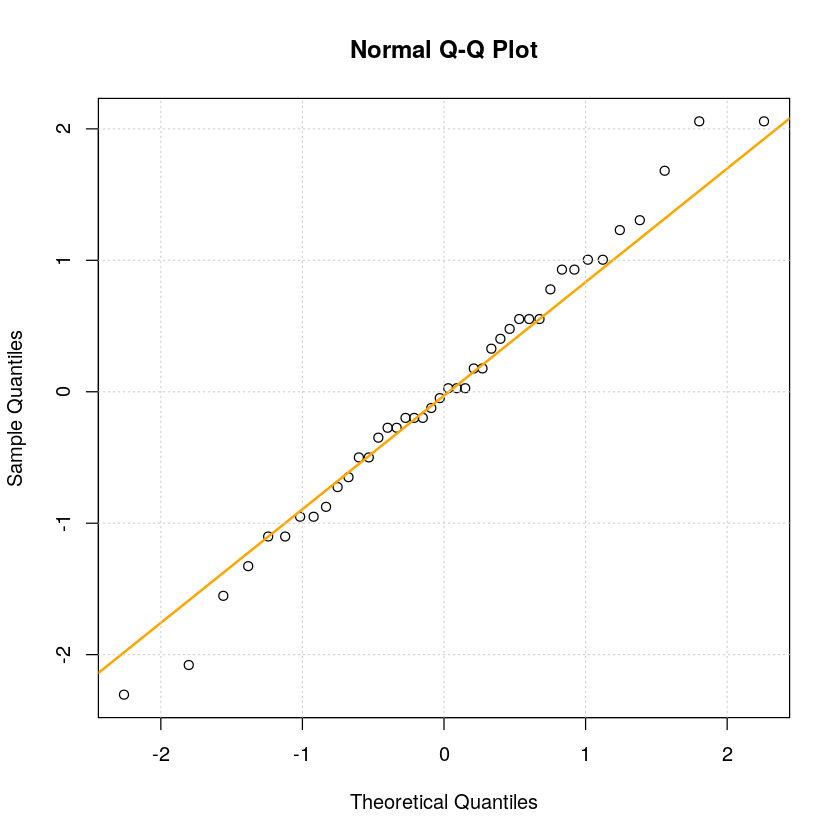

In [3]:
qqnorm((weight-mean(weight))/sd(weight))
qqline((weight-mean(weight))/sd(weight),col='orange',lwd=2)
grid()

Loading required package: magrittr



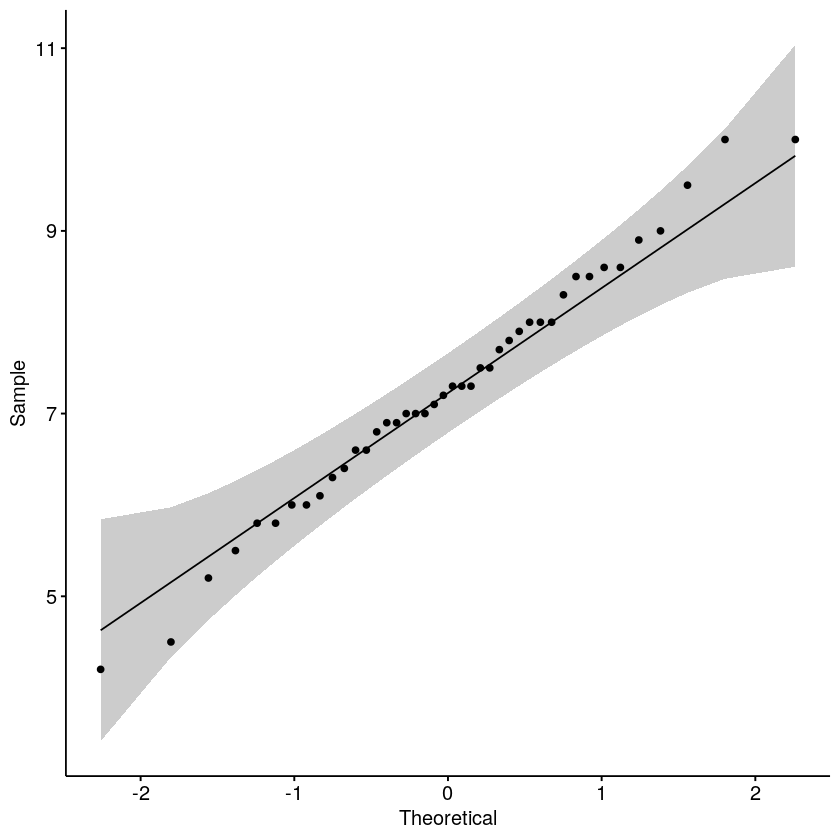

In [6]:
library(ggplot2)
library(ggpubr)
ggqqplot(weight)

# Origen de la vida

Datos basados en:
* [Life Before Earth](https://arxiv.org/pdf/1304.3381.pdf)
* [Genome increase as a clock for the origin and evolution of life](https://biologydirect.biomedcentral.com/track/pdf/10.1186/1745-6150-1-17?site=biologydirect.biomedcentral.com)


La siguiente tabla muestra la complejidad de ADN, eliminando las redundancias, de diferentes grupos de animales y su aparición en la tierra:

| especies | genoma completo | genoma sin redundancia | aparición |
| - | - | - | - |
| mamíferos | $3.2 · 10^9$pb | $4.8 · 10^8$pb | 125 ma |
| peces     | $4.8 · 10^8$pb | $1.6 · 10^8$pb | 500 ma |
| gusanos   | $9.7 · 10^7$pb | $7.2 · 10^7$pb | 1000ma |
| eucariotas| $2.9 · 10^6$pb | $2.9 · 10^6$pb | 2100ma |
| procariotas|$5 · 10^5$pb   | $5 · 10^5$pb   | 3500ma |


Las columnas significan:
* especies: especies de animales.
* genoma completo: Longitud del genoma de una especie medido en pares de bases de ADN.
* genoma completo: Longitud del genoma de una especie, eliminando la redundancia, medido en pares de bases de ADN.
* aparición: Cuando ese conjunto de especies aparecieron.

Con estos datos tratar de obtener una regresión que indique cuando apareció un organismo con solo 1 par de bases genéticas. Esto podría marcar el origen de la vida.

¿Qué columna habría que coger para hacer la regresión la del genoma completo o el que elimina la redundancia?

Ayuda: Es mejor usar escalas logarítmicas.

In [7]:
df<-data.frame(especie=c("mamíferos","peces","gusanos","eucariotas","procariotas"),
           gen_total=c(3.2e9,4.8e8,9.7e7,2.9e6,5e5),
          gen_reduc=c(4.8e8,1.6e8,7.2e7,2.9e6,5e5),
          aparicion=c(-125,-500,-1000,-2100,-3550))

In [8]:
df

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,3.2e+09,4.8e+08,-125
peces,4.8e+08,1.6e+08,-500
gusanos,9.7e+07,7.2e+07,-1000
eucariotas,2.9e+06,2.9e+06,-2100
procariotas,5.0e+05,5.0e+05,-3550


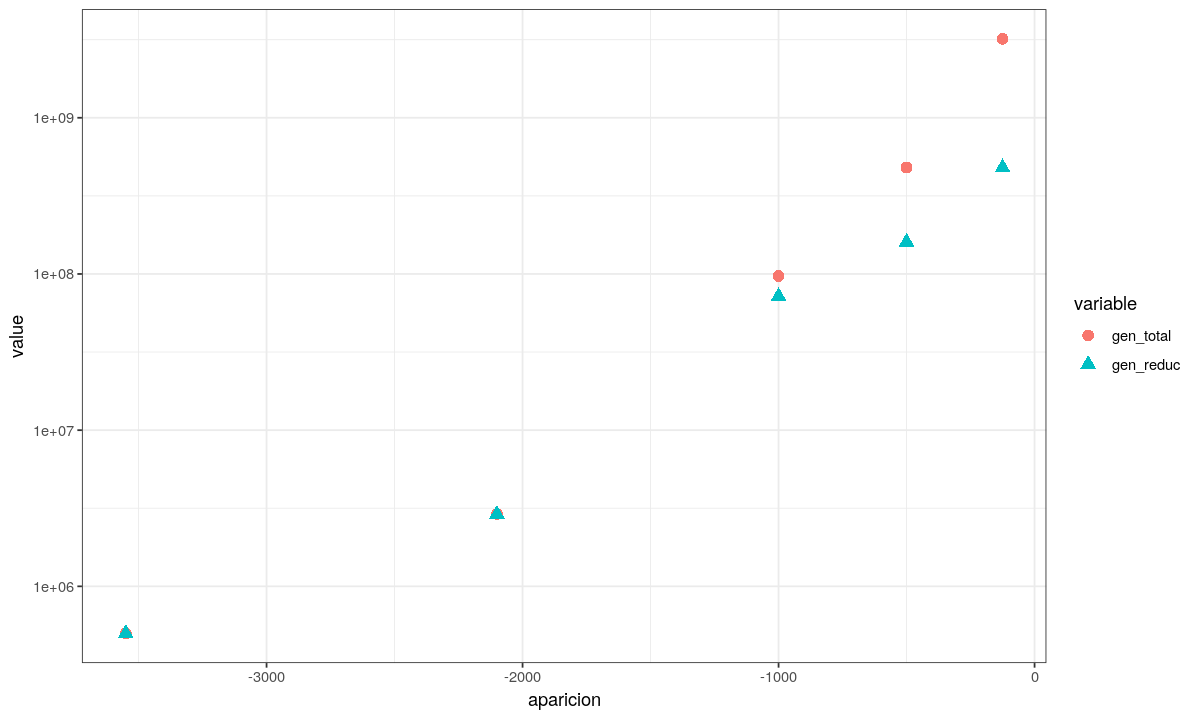

In [15]:
options(repr.plot.height=6,repr.plot.width=10)
library(ggplot2)
library(reshape2)

dfm<-melt(df,id=c("especie","aparicion"))
ggplot(data=dfm,aes(x=aparicion,y=value,shape=variable,color=variable))+
 geom_point(size=3)+theme_bw()+scale_y_log10()

In [16]:
dflog<-df
dflog[,2:3]<-log10(dflog[,2:3])
dflog

especie,gen_total,gen_reduc,aparicion
<fct>,<dbl>,<dbl>,<dbl>
mamíferos,9.505150,8.681241,-125
peces,8.681241,8.204120,-500
gusanos,7.986772,7.857332,-1000
eucariotas,6.462398,6.462398,-2100
procariotas,5.698970,5.698970,-3550


In [18]:
# gen_total = Coeficiente_2*aparicion + Coeficiente_1
model_total<-lm(data=dflog,formula=gen_total~aparicion)
summary(model_total)
confint(model_total)


Call:
lm(formula = gen_total ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.37584 -0.03573 -0.18043 -0.49530  0.33562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.266749   0.290574  31.891 6.78e-05 ***
aparicion   0.001099   0.000152   7.235  0.00545 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4215 on 3 degrees of freedom
Multiple R-squared:  0.9458,	Adjusted R-squared:  0.9277 
F-statistic: 52.35 on 1 and 3 DF,  p-value: 0.005446


,2.5 %,97.5 %
(Intercept),8.342012990,10.191485720
aparicion,0.000615892,0.001583205


In [19]:
# gen_reduc = Coeficiente_2*aparicion + Coeficiente_1
model_reduc<-lm(data=dflog,formula=gen_reduc~aparicion)
summary(model_reduc)
confint(model_reduc)


Call:
lm(formula = gen_reduc ~ aparicion, data = dflog)

Residuals:
       1        2        3        4        5 
 0.11643 -0.02685  0.07147 -0.34422  0.18317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.676e+00  1.648e-01   52.65 1.51e-05 ***
aparicion   8.902e-04  8.618e-05   10.33  0.00194 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.239 on 3 degrees of freedom
Multiple R-squared:  0.9727,	Adjusted R-squared:  0.9635 
F-statistic: 106.7 on 1 and 3 DF,  p-value: 0.001936


,2.5 %,97.5 %
(Intercept),8.1516749653,9.200497634
aparicion,0.0006159445,0.001164501


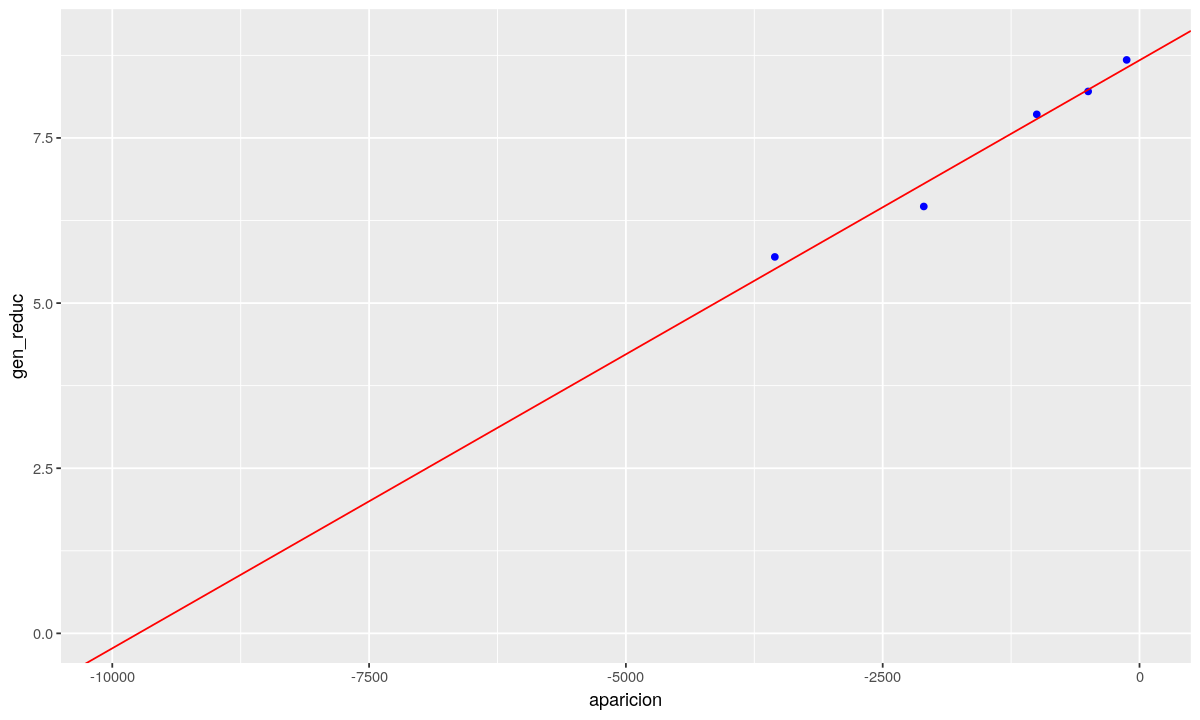

In [29]:
ggplot(data=dflog,aes(x=aparicion,y=gen_reduc))+geom_point(color="blue")+
 geom_abline(intercept=model_reduc$coef[1], slope=model_reduc$coef[2],color="red")+
 xlim(c(-10e3,0))+ylim(c(0,9))

In [31]:
inverse.lineal.model<-function(y,model){
    # y = coef[1] + coef[2]*x
    # x = (y-coef[1])/coef[2]
    (y-model$coef[1])/model$coef[2]
}
paste("El origen de la vida podría haber ocurrido hace ",
      round(abs(inverse.lineal.model(0,model_reduc))),
      "millones de años")

[1] "El origen de la vida podría haber ocurrido hace  9746 millones de años"

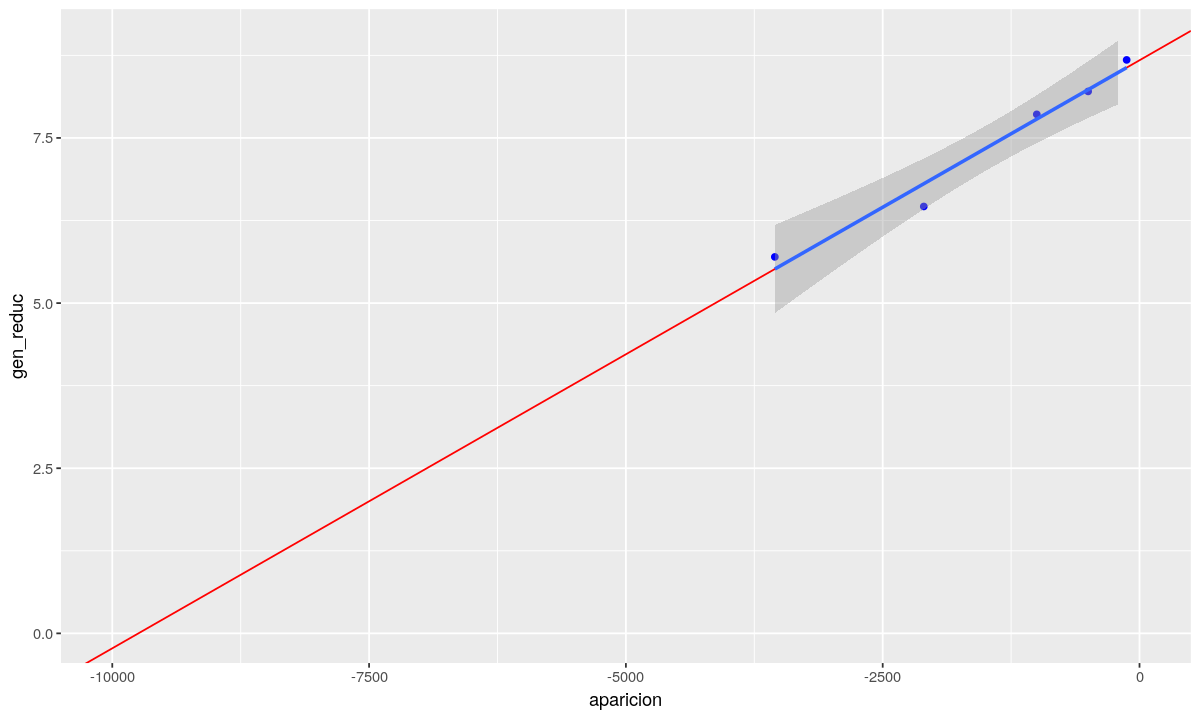

In [32]:
ggplot(data=dflog,aes(x=aparicion,y=gen_reduc))+geom_point(color="blue")+
 geom_abline(intercept=model_reduc$coef[1], slope=model_reduc$coef[2],color="red")+
 xlim(c(-10e3,0))+ylim(c(0,9))+geom_smooth(method="lm")

In [33]:
lm(data=dflog,formula=aparicion~gen_reduc)


Call:
lm(formula = aparicion ~ gen_reduc, data = dflog)

Coefficients:
(Intercept)    gen_reduc  
      -9519         1093  


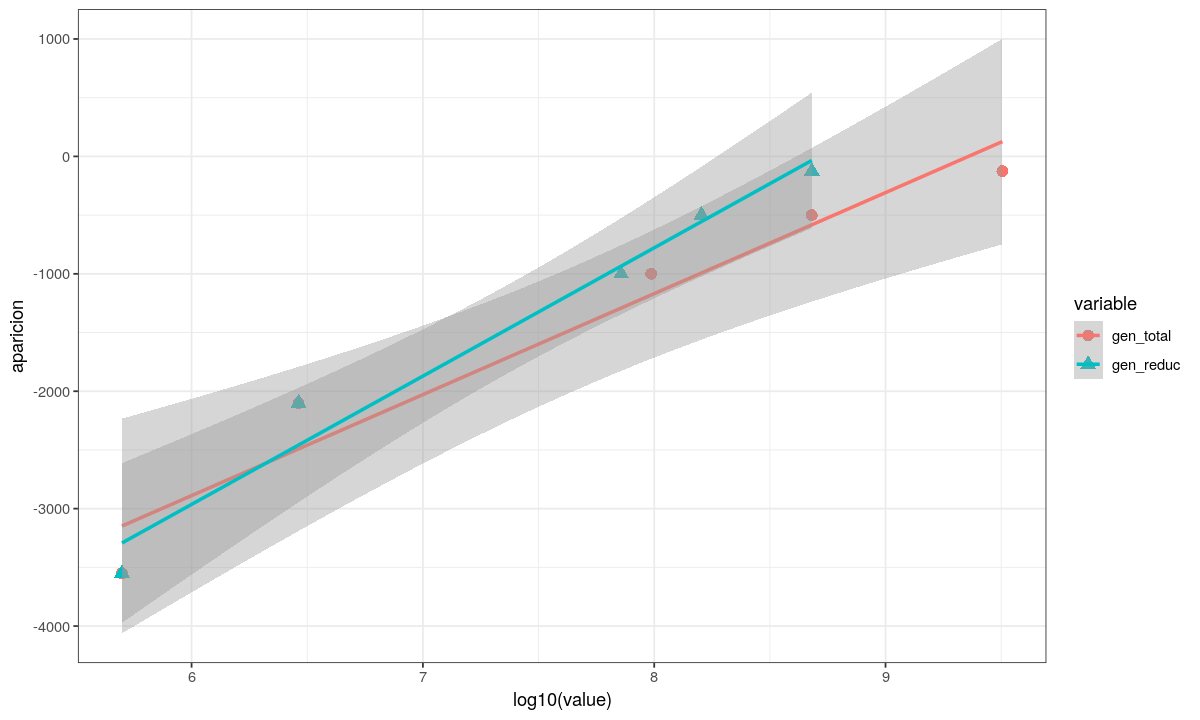

In [34]:
ggplot(data=dfm,aes(y=aparicion,x=log10(value),shape=variable,color=variable))+
 geom_point(size=3)+theme_bw()+geom_smooth(method="lm")